In [86]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.cluster import KMeans

In [87]:
data = pd.read_csv("clustering_data.csv")
data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6
0,-9.780,4.98,3.830,-9.27,7.210,-0.459
1,-2.080,5.18,0.215,-9.76,7.420,-3.320
2,-0.549,1.39,1.120,-7.46,5.680,-9.120
3,-6.020,-2.05,2.200,-8.85,7.930,-2.790
4,-8.960,5.23,1.950,4.09,-0.732,4.390


In [88]:
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

print(f"""Explained variance ratio: 
{pca.explained_variance_ratio_ * 100} %""")

Explained variance ratio: 
[50.67622578 23.93435779] %


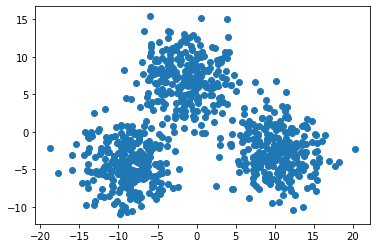

In [89]:
plt.figure()
plt.scatter(data_pca[:,0:1], data_pca[:,1:2])
plt.show()

In [94]:
# Finding "optimal" parameters for clustering using randomised search by cross validation.
# In the first one we find "optimal" parameters for 3 clusters.
# In the second one we find "optimal" parameters for 9 clusters.
# Reason why I chose 3 and 9 is because the data is nicely clustered to 3 clusters 
# and using 9 we can cluster those clusters to more specific clusters.

params_grid_3 = {
    "n_clusters" : [3],
    "init" : ["k-means++", "random"],
    "n_init" : np.arange(10, 100, step=2),
    "max_iter" : np.arange(100, 1000, step=20),
    "algorithm" : ["full", "elkan"]
}

random_cv_3 = RandomizedSearchCV(KMeans(), params_grid_3, n_iter=50, n_jobs=-1)
random_cv_3.fit(data)

params_grid_9 = {
    "n_clusters" : [9],
    "init" : ["k-means++", "random"],
    "n_init" : np.arange(10, 100, step=2),
    "max_iter" : np.arange(100, 1000, step=20),
    "algorithm" : ["full", "elkan"]
}

random_cv_9 = RandomizedSearchCV(KMeans(), params_grid_9, n_iter=50, n_jobs=-1)
random_cv_9.fit(data)

print(f"""
3 clusters
Optimal KMeans parameters 
{random_cv_3.best_params_}
Best params score
{random_cv_3.best_score_}

9 clusters
Optimal KMeans parameters 
{random_cv_9.best_params_}
Best params score
{random_cv_9.best_score_}
""")


3 clusters
Optimal KMeans parameters 
{'n_init': 42, 'n_clusters': 3, 'max_iter': 540, 'init': 'random', 'algorithm': 'full'}
Best params score
-8615.826795353418

9 clusters
Optimal KMeans parameters 
{'n_init': 34, 'n_clusters': 9, 'max_iter': 780, 'init': 'random', 'algorithm': 'elkan'}
Best params score
-6953.435563838952



In [95]:
kmeans_3 = KMeans(n_clusters=3, n_init=42, max_iter=540, init="random", algorithm="full")
kmeans_3.fit(data_pca)

kmeans_9 = KMeans(n_clusters=9, n_init=34, max_iter=780, init="random", algorithm="elkan")
kmeans_9.fit(data_pca)

KMeans(algorithm='elkan', init='random', max_iter=780, n_clusters=9, n_init=34)

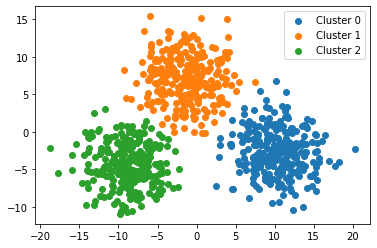

In [96]:
# 3 Clusters
plt.figure()
plt.scatter(data_pca[kmeans_3.labels_==0, 0], data_pca[kmeans_3.labels_==0, 1], label="Cluster 0")
plt.scatter(data_pca[kmeans_3.labels_==1, 0], data_pca[kmeans_3.labels_==1, 1], label="Cluster 1")
plt.scatter(data_pca[kmeans_3.labels_==2, 0], data_pca[kmeans_3.labels_==2, 1], label="Cluster 2")
plt.legend()
plt.show()

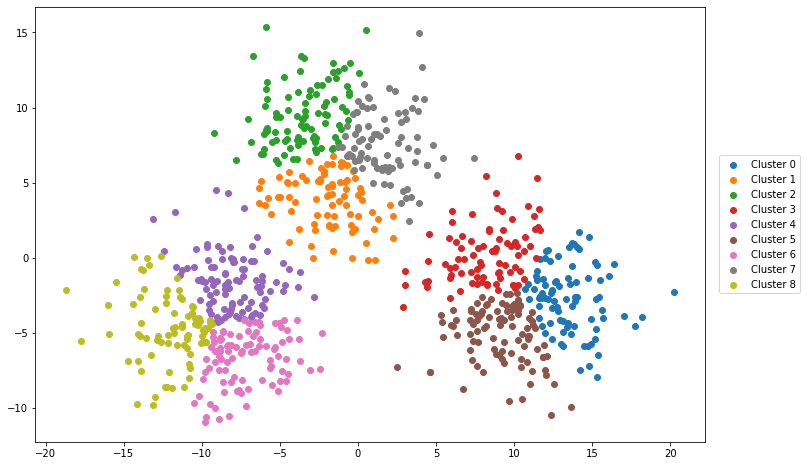

In [97]:
# 9 Clusters
plt.figure(figsize=(12, 8))
for i in range(0, 9):
    plt.scatter(data_pca[kmeans_9.labels_==i, 0], data_pca[kmeans_9.labels_==i, 1], label=f"Cluster {i}")
plt.legend(loc="center right", bbox_to_anchor = (1.15, 0.5))
plt.show()